In [1]:
from mistralai.client import MistralClient

client = MistralClient('')

In [14]:
import pandas as pd

df = pd.read_csv('data.csv')
data = df['Sentence'].tolist()
df.head()

,Unnamed: 0,Sentence,Label
0,0,The Cardiff Roller Collective (CRoC) are a rol...,11
1,1,"""Go! Pack Go!"" is the fight song of the Green ...",11
2,2,Al-Machriq (English translation: The East) was...,14
3,3,Ajman International Airport (Arabic: مطار عجما...,0
4,4,Kapla is a construction set for children and a...,4


In [15]:
from sklearn.metrics.pairwise import euclidean_distances

def get_text_embedding(text):
    return client.embeddings(model = "mistral-embed", input=[text]).data[0].embedding


print(get_text_embedding(data[0]))

[-0.0196533203125, 0.0006737709045410156, 0.02239990234375, -0.0321044921875, 0.02874755859375, 0.0119171142578125, 0.006290435791015625, -0.0232391357421875, -0.0229644775390625, -0.059234619140625, 0.0011205673217773438, 0.033538818359375, -0.0150299072265625, -0.00702667236328125, -0.0555419921875, -0.0058441162109375, 0.004268646240234375, 0.0257415771484375, 0.00960540771484375, 0.01541900634765625, -0.01611328125, -0.019012451171875, -0.03436279296875, 0.010528564453125, -0.0506591796875, 0.014251708984375, -0.0082855224609375, -0.04876708984375, -0.0276947021484375, 0.0210723876953125, 0.0110321044921875, -0.0210418701171875, -0.01007080078125, 0.0138397216796875, -0.0165863037109375, -0.01551055908203125, -0.01511383056640625, -0.06829833984375, 0.0168914794921875, 0.0009608268737792969, -0.0279541015625, -0.0167694091796875, -0.008575439453125, -0.00994110107421875, -0.0296173095703125, -0.0174713134765625, 0.004787445068359375, 0.000522613525390625, 0.0051422119140625, -0.013

In [12]:
def get_embeddings_by_chunks(data, chunk_size):
    chunks = [data[x:x+chunk_size] for x in range(0, len(data), chunk_size)]
    embeddings_response = [client.embeddings(model="mistral-embed", input=c) for c in chunks]
    embeddings = []
    for i in range(len(embeddings_response)):
        for d in embeddings_response[i].data:
            embeddings.append(d.embedding)
    return embeddings



In [16]:
df['embedding'] = get_embeddings_by_chunks(df['Sentence'].tolist(), 1000)
df.head()

,Unnamed: 0,Sentence,Label,embedding
0,0,The Cardiff Roller Collective (CRoC) are a rol...,11,"[-0.019622802734375, 0.0006594657897949219, 0...."
1,1,"""Go! Pack Go!"" is the fight song of the Green ...",11,"[-0.019378662109375, 0.00595855712890625, 0.03..."
2,2,Al-Machriq (English translation: The East) was...,14,"[-0.01538848876953125, 0.033447265625, 0.03771..."
3,3,Ajman International Airport (Arabic: مطار عجما...,0,"[0.01739501953125, 0.0211639404296875, 0.06280..."
4,4,Kapla is a construction set for children and a...,4,"[-0.032470703125, 0.0290985107421875, 0.066040..."


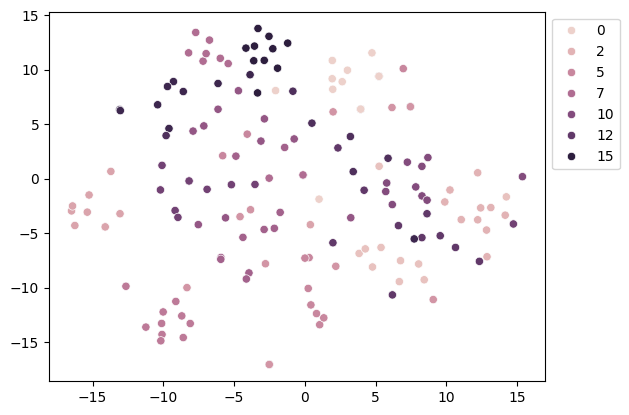

In [6]:
# Visualize embeddings
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=0).fit_transform(np.array(df['embedding'].to_list()))
ax = sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=np.array(df['Label'].to_list()))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

In [9]:
# Similarity search
import faiss
import numpy as np

In [10]:
d = 1024
nb = 10000
nq = 1000

In [ ]:
# build index: d=size of vetors
index = faiss.IndexFlatL2(512)
